<a href="https://colab.research.google.com/github/krishpatel1077/CS4342-krish/blob/master/CS4342HW2_AppliedQuestions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 2 CS 4342 Applied Questions

##Question 1A:

In [ ]:
import pandas as pd
import statsmodels.api as sm

auto_data = pd.read_csv("Auto.csv")
X = auto_data['horsepower']
X = sm.add_constant(X)
y = auto_data['mpg']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           7.03e-81
Time:                        00:06:36   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

I. The p-value for horsepower and mph is extremely small (almost 0), therefore, there is a significant statistical relationship between horsepower and mpg

II. To determine the strength of the relationship, the R squared value was calculated:

In [ ]:
import pandas as pd
import statsmodels.api as sm

auto_data = pd.read_csv("Auto.csv")
X = auto_data['horsepower']
X = sm.add_constant(X)
y = auto_data['mpg']
model = sm.OLS(y, X).fit()

residuals = y - model.predict(X)
# Calculate the Residual Sum of Squares (RSS)
rss = (residuals ** 2).sum()
# Calculate the Total Sum of Squares (TSS)
mean_y = y.mean()
tss = ((y - mean_y) ** 2).sum()
# Calculate the R-squared (R²) value
r_squared = 1 - (rss / tss)

print("R-squared (R²) Value:", r_squared)

R-squared (R²) Value: 0.6059482578894348


From the R squared value, we can determine that the variance of this model was 60.59%. This means the model explains most of the variability, supporting our thesis of a strong relationship.

III. As we can see from the parameter estimate of horsepower (see part 1), the value is negative, signifying a **negative relationship**.

IV. See Code Below

In [ ]:
import pandas as pd
import statsmodels.api as sm

auto_data = pd.read_csv("Auto.csv")
X = auto_data['horsepower']
X = sm.add_constant(X)
y = auto_data['mpg']
model = sm.OLS(y, X).fit()

# Predict mpg for a horsepower of 95
horsepower_to_predict = 95
prediction = model.predict([1, horsepower_to_predict])  # 1 represents the constant term

print("Predicted mpg for horsepower 95:", prediction[0])


Predicted mpg for horsepower 95: 24.94061135257339


## Question 1B:

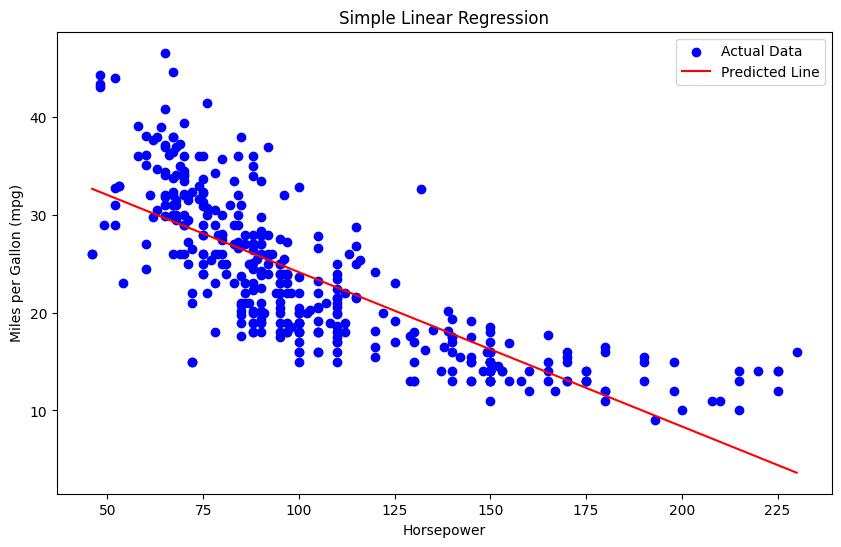

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


auto_data = pd.read_csv("Auto.csv")
X = auto_data['horsepower']
X = sm.add_constant(X)
y = auto_data['mpg']
model = sm.OLS(y, X).fit()

# Predict mpg for a range of horsepower values
min_horsepower = X['horsepower'].min()
max_horsepower = X['horsepower'].max()
predicted_values = model.predict(sm.add_constant(range(int(min_horsepower), int(max_horsepower) + 1)))

# Plot the data points and the predicted line
plt.figure(figsize=(10, 6))
plt.scatter(X['horsepower'], y, label='Actual Data', color='blue')
plt.plot(range(int(min_horsepower), int(max_horsepower) + 1), predicted_values, label='Predicted Line', color='red')
plt.xlabel('Horsepower')
plt.ylabel('Miles per Gallon (mpg)')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

## Question 2A

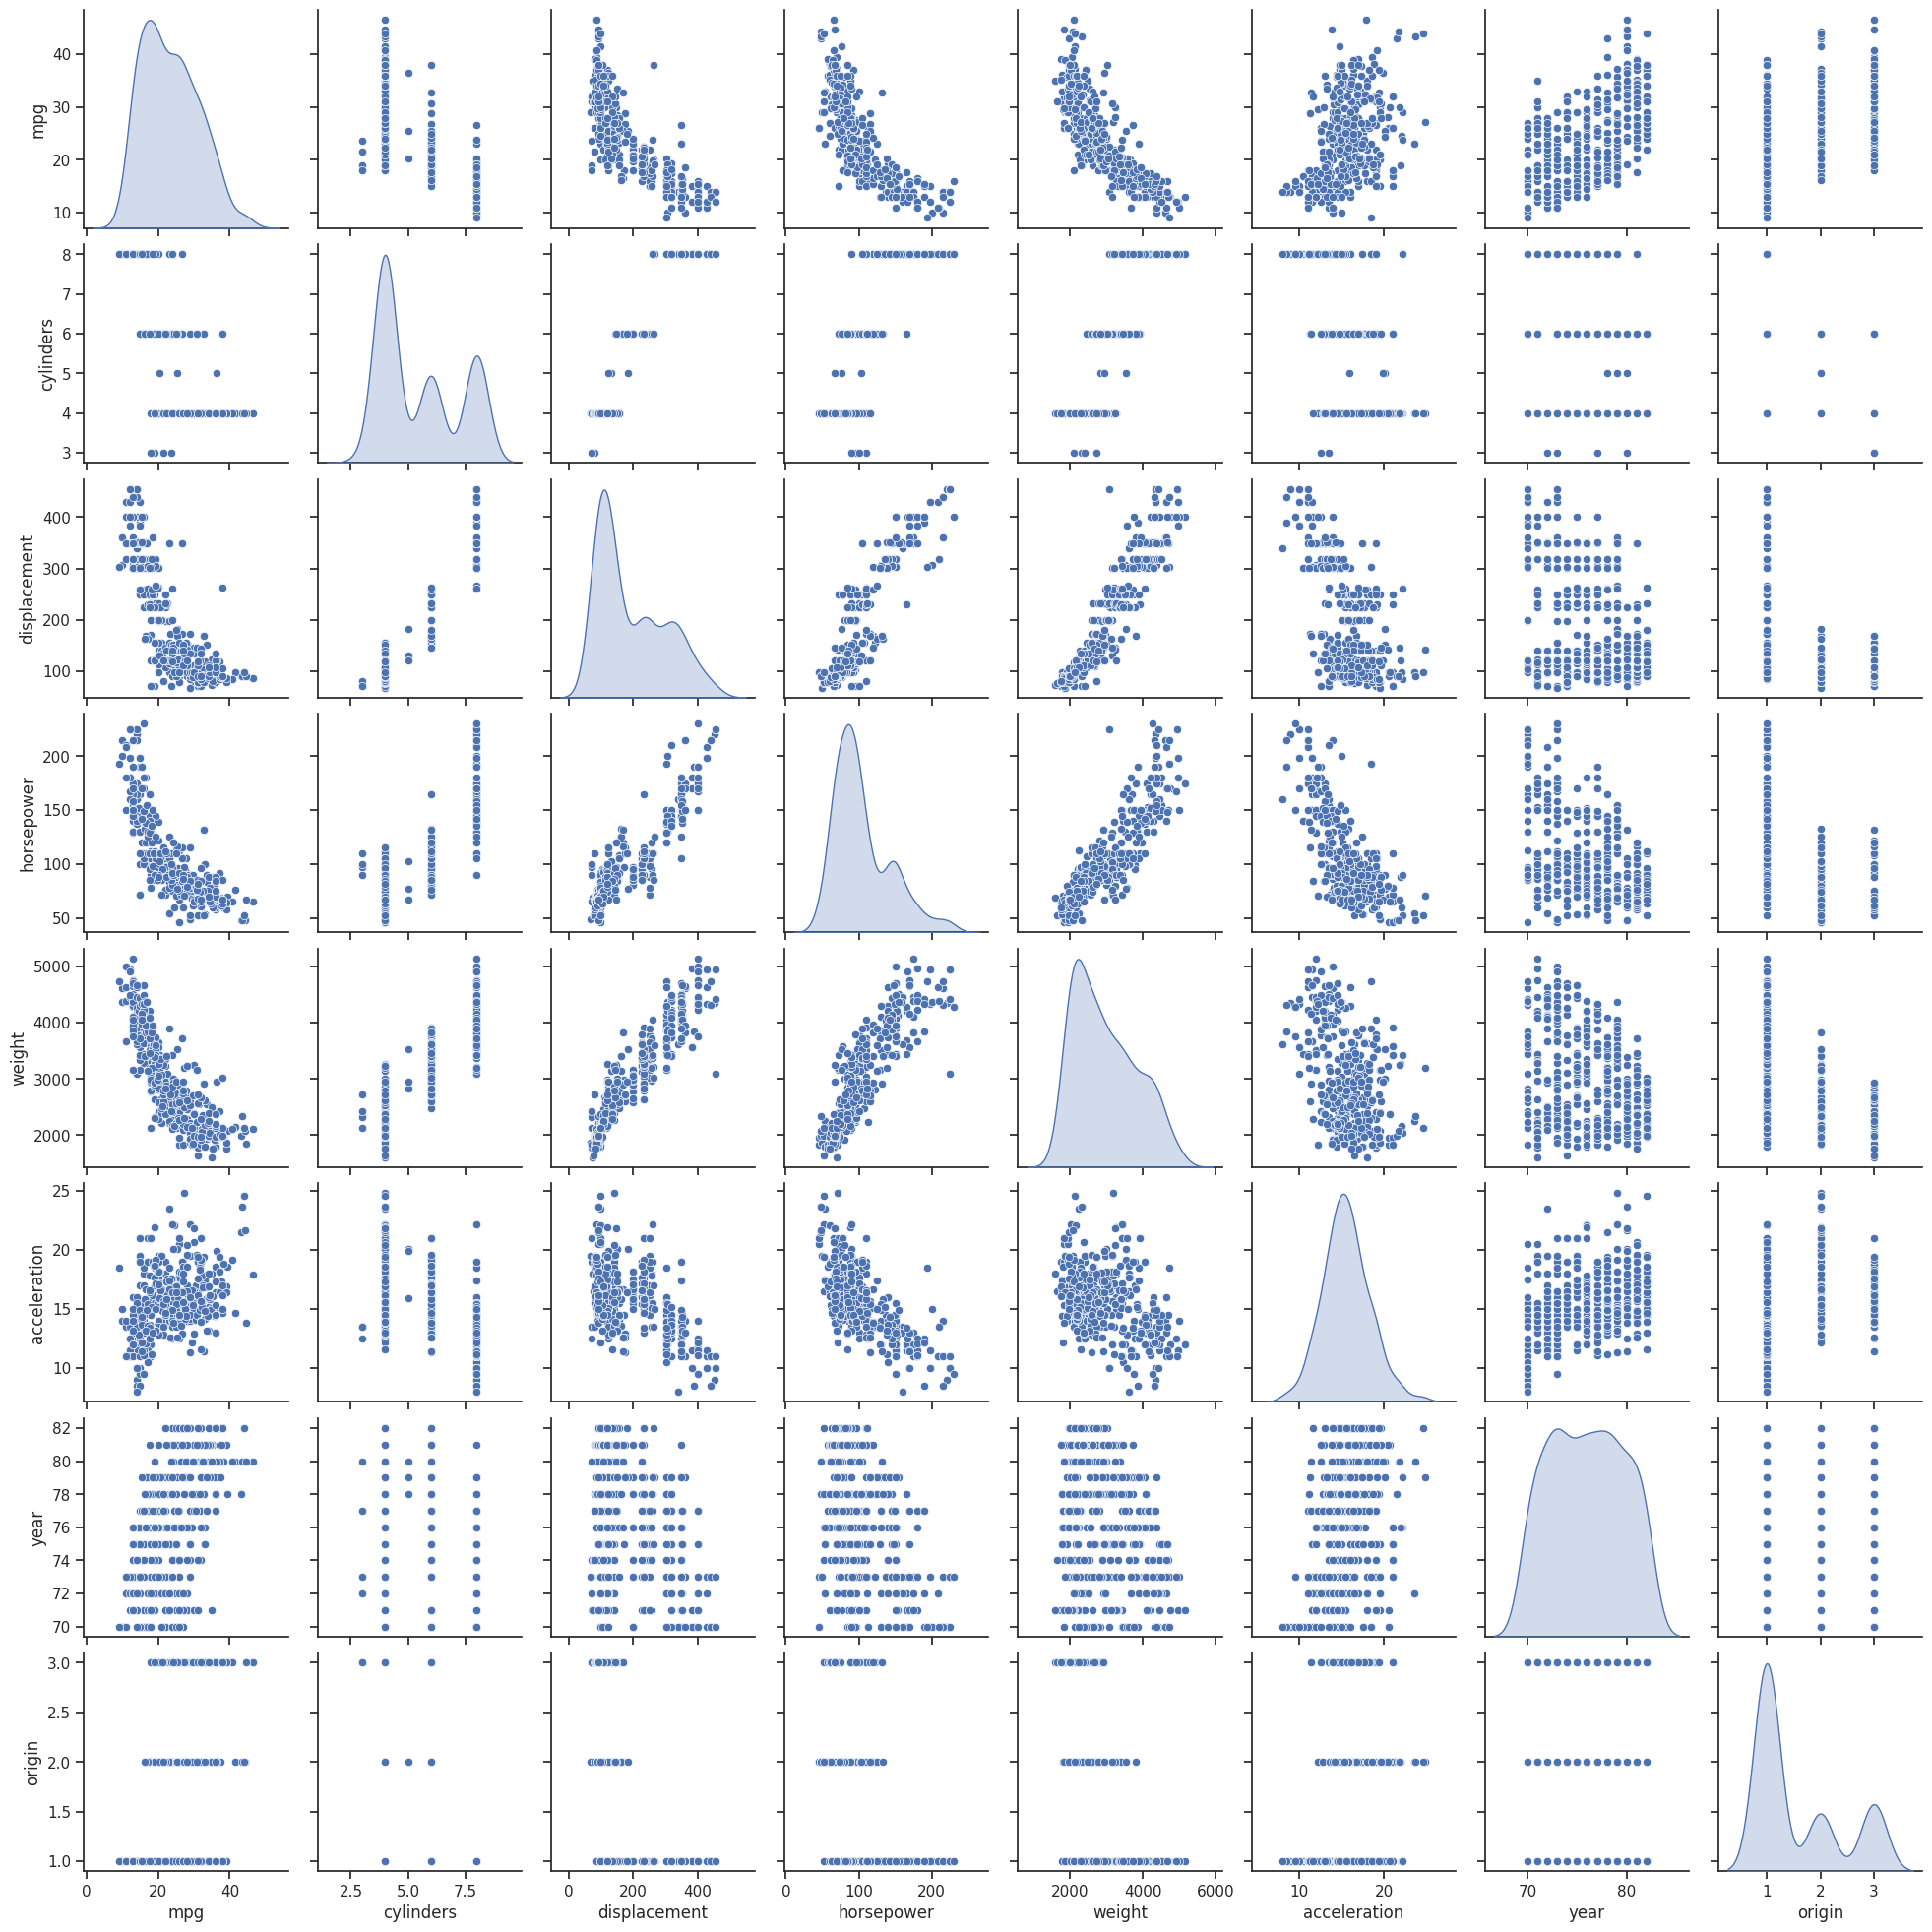

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
auto_data = pd.read_csv("Auto.csv")

# Create the scatterplot matrix
sns.set(style="ticks")
sns.pairplot(auto_data, diag_kind="kde")

# Show the plot
plt.show()


##Question 2B

In [ ]:
import pandas as pd

auto_data = pd.read_csv("Auto.csv")
auto_data_numeric = auto_data.drop(columns=['name'])
correlation_matrix = auto_data_numeric.corr()

print("Matrix of Correlations:")
print(correlation_matrix)


Matrix of Correlations:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.0000

##Question 2C

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
auto_data = pd.read_csv("Auto.csv")

# Exclude the "name" column, which is qualitative
auto_data_numeric = auto_data.drop(columns=['name'])

# Create the predictor variables (independent variables)
X = auto_data_numeric.drop(columns=['mpg'])  # Exclude 'mpg' from predictors
X = sm.add_constant(X)  # Add a constant (intercept)

# Create the response variable (dependent variable)
y = auto_data_numeric['mpg']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          2.04e-139
Time:                        00:57:46   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

From this data, one can assume the following about each predictor vs. mpg:

Const, displacement, weight, year, and origin all have small p-values, signifying a relationship with the mpg indicator. However, const, cylinders, horsepower, weight, and acceleration all have negative relationships with the mpg indicator. Additionally, due to the high p-values, it is inconclusive to determine a statistical relationship between mpg and cylinders, horsepower, and acceleration.

The coefficient for the year variable (0.7508) suggests that for each year, there is a 0.7508 factor increase (75.08%) in mpg.


##Question 2D

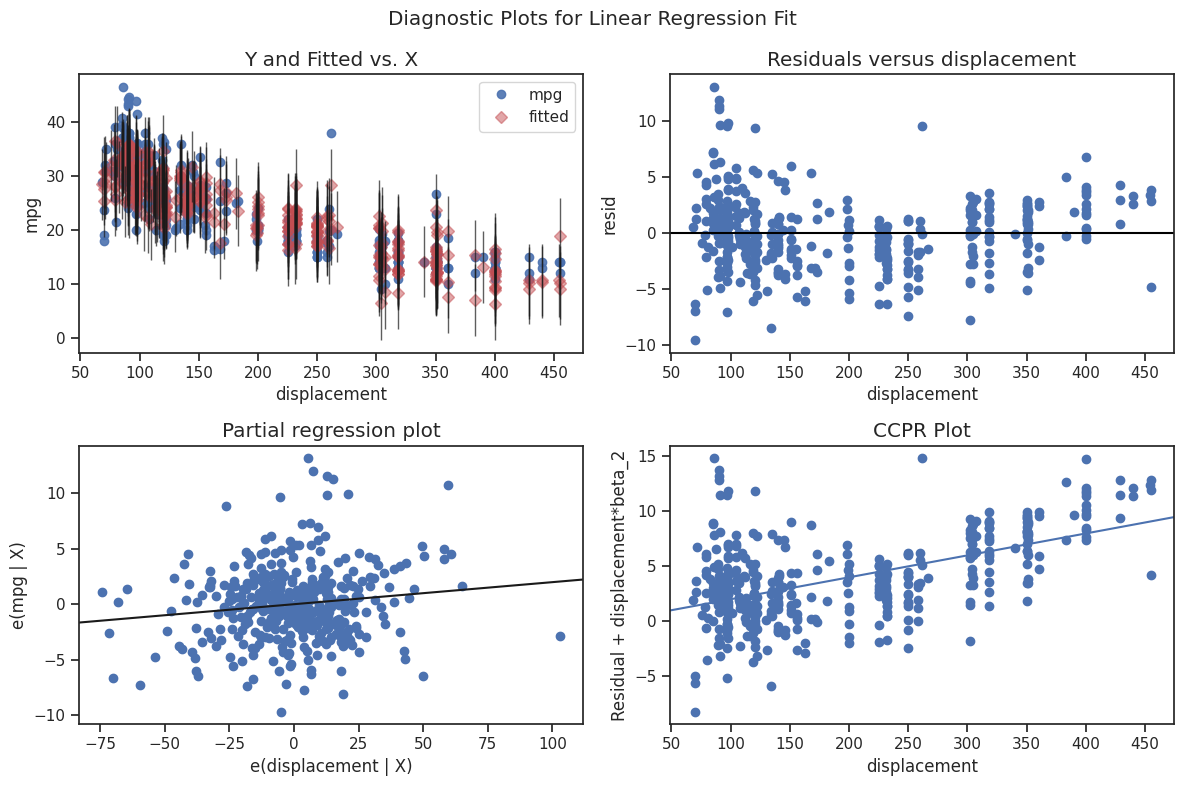

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.graphics.regressionplots as sm_graph
import matplotlib.pyplot as plt

# Load the dataset
auto_data = pd.read_csv("Auto.csv")

# Exclude the "name" column, which is qualitative
auto_data_numeric = auto_data.drop(columns=['name'])

# Create the predictor variables (independent variables)
X = auto_data_numeric.drop(columns=['mpg'])  # Exclude 'mpg' from predictors
X = sm.add_constant(X)  # Add a constant (intercept)

# Create the response variable (dependent variable)
y = auto_data_numeric['mpg']

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Produce diagnostic plots
fig = plt.figure(figsize=(12, 8))
sm_graph.plot_regress_exog(model, "displacement", fig=fig)
plt.suptitle("Diagnostic Plots for Linear Regression Fit")
plt.show()


As evidenced by the graphs, all of the charts seem to represent a linear relationship among the displacement predictor. All the data seems to be fitted properly

##Question 2E

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
auto_data = pd.read_csv("Auto.csv")

# Create the predictor variables (independent variables)
X = auto_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
X = sm.add_constant(X)  # Add a constant (intercept)

# Create the response variable (dependent variable)
y = auto_data['mpg']

# Fit the linear regression model with interaction terms
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print("Linear Regression Model with Predictors and Interaction Terms:")
print(model.summary())


Linear Regression Model with Predictors and Interaction Terms:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          2.04e-139
Time:                        01:39:06   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

Const is statistically significant, indicating a baseline mpg value when all other predictors are at zero. Cylinders and acceleration are not statistically significant (P>|t| = 0.128 and 0.415, respectively). In contrast, displacement and weight are statistically significant with positive and negative coefficients, respectively. Year is highly statistically significant, with a positive coefficient, indicating that as the year increases, mpg tends to increase. Origin is statistically significant and positively associated with mpg. Horsepower, however, is not statistically significant (P>|t| = 0.220). The model's overall R-squared value of 0.821 signifies a good fit, but the large condition number raises concerns about potential multicollinearity among predictors, necessitating further investigation and model refinement.

##Question 2F

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
auto_data = pd.read_csv("Auto.csv")

# Create the response variable (dependent variable)
y = auto_data['mpg']

# Fit the linear regression model with only interaction terms
model = sm.OLS(y, sm.add_constant(auto_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']])).fit()

# Print the summary of the regression results
print("Linear Regression Model with Only Interaction Terms:")
print(model.summary())


Linear Regression Model with Only Interaction Terms:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          2.04e-139
Time:                        03:20:03   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

* R-squared (R²): 0.821, indicating that the model explains approximately 82.1% of the variance in mpg.
* The overall model is statistically significant, with a low p-value for the F-statistic.
* Cylinders, horsepower, and acceleration are not statistically significant (P>|t| > 0.05).
* Displacement, weight, and year are statistically significant
* The condition number remains large, suggesting potential multicollinearity among predictors.

##Question 2G

In [ ]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load the dataset
auto_data = pd.read_csv("Auto.csv")

# Apply transformations to predictor variables
auto_data['log_displacement'] = np.log(auto_data['displacement'])
auto_data['sqrt_weight'] = np.sqrt(auto_data['weight'])
auto_data['weight_squared'] = auto_data['weight'] ** 2

# Create the predictor variables with transformations
X = auto_data[['cylinders', 'log_displacement', 'horsepower', 'sqrt_weight', 'acceleration', 'year', 'origin']]
X = sm.add_constant(X)  # Add a constant (intercept)

# Create the response variable (dependent variable)
y = auto_data['mpg']

# Fit the linear regression model with transformed predictors
model = sm.OLS(y, X).fit()

# Print the summary of the regression results
print("Linear Regression Model with Transformed Predictors:")
print(model.summary())


Linear Regression Model with Transformed Predictors:
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     275.7
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          1.74e-145
Time:                        03:23:08   Log-Likelihood:                -1009.2
No. Observations:                 392   AIC:                             2034.
Df Residuals:                     384   BIC:                             2066.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

* R-squared (R²): 0.834, indicating that the model explains approximately 83.4% of the variance in mpg.
* The overall model is statistically significant, supported by a low p-value for the F-statistic (Prob (F-statistic): 1.74e-145).
* Horsepower and acceleration are not statistically significant (P>|t| > 0.05).
* Cylinders, log_displacement, sqrt_weight, year, and origin remain statistically significant.
The condition number remains large, implying the presence of potential multicollinearity among predictors.
* In summary, this model with transformed predictors exhibits a good fit. The presence of a large condition number suggests potential multicollinearity, which may require further examination and model adjustments.